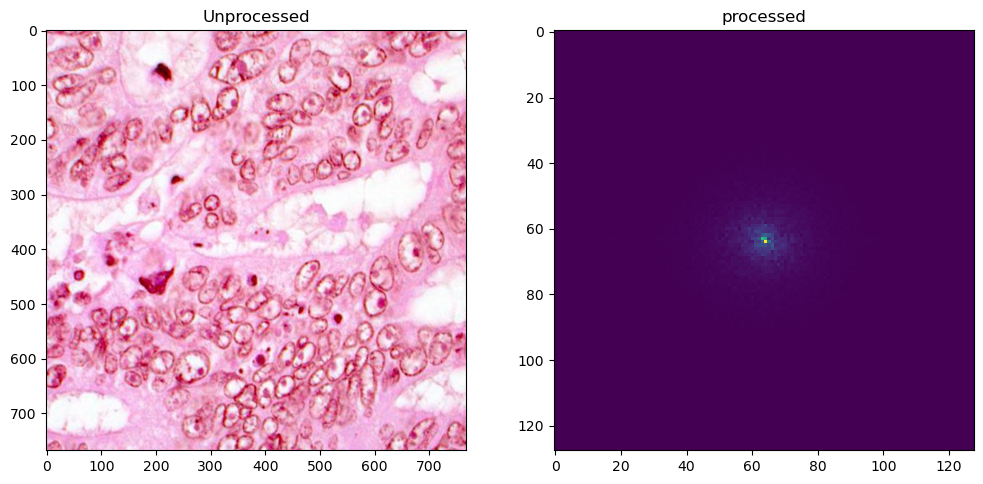

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load image in grayscale
img = cv2.imread(r"C:\Users\Asus\Desktop\PG Project\Nandhini\colon_image_set\colon_image_sets\Training\colon_aca\colonca1509.jpeg",1)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the image to a NumPy array
img_array = np.array(gray)

# Apply 2D-DFT
dft = cv2.dft(np.float32(img_array), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Get magnitude spectrum
mag_spec = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])

# Resize magnitude spectrum
mag_spec = cv2.resize(mag_spec, (128, 128))

# Normalize magnitude spectrum
mag_spec = cv2.normalize(mag_spec, None, 0, 255, cv2.NORM_MINMAX)

b,g,r = cv2.split(img)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)

# Display image
#cv2.imshow('Magnitude Spectrum', mag_spec)

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Unprocessed')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(mag_spec)
ax2.title.set_text('processed')


In [ ]:
import cv2
img = cv2.imread(r"C:\Users\Asus\Desktop\PG Project\Nandhini\colon_image_set\colon_image_sets\Training\colon_aca\colonca1509.jpeg",1)
b,g,r = cv2.split(img)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)

In [2]:
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image and convert it to grayscale
image = cv2.imread(r'C:\Users\Asus\Desktop\abc.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the wavelet function and level of decomposition
wavelet = 'db1'
level = 2

# Perform 2D DWT
coeffs = pywt.wavedec2(gray, wavelet, mode='periodization', level=level)

# Reconstruct the original image using the coefficients
reconstructed_image = pywt.waverec2(coeffs, wavelet, mode='periodization')

# Display the original and reconstructed images
#cv2.imshow("Original", gray)
#cv2.imshow("Reconstructed", reconstructed_image)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Unprocessed')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(reconstructed_image)
ax2.title.set_text('processed')

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


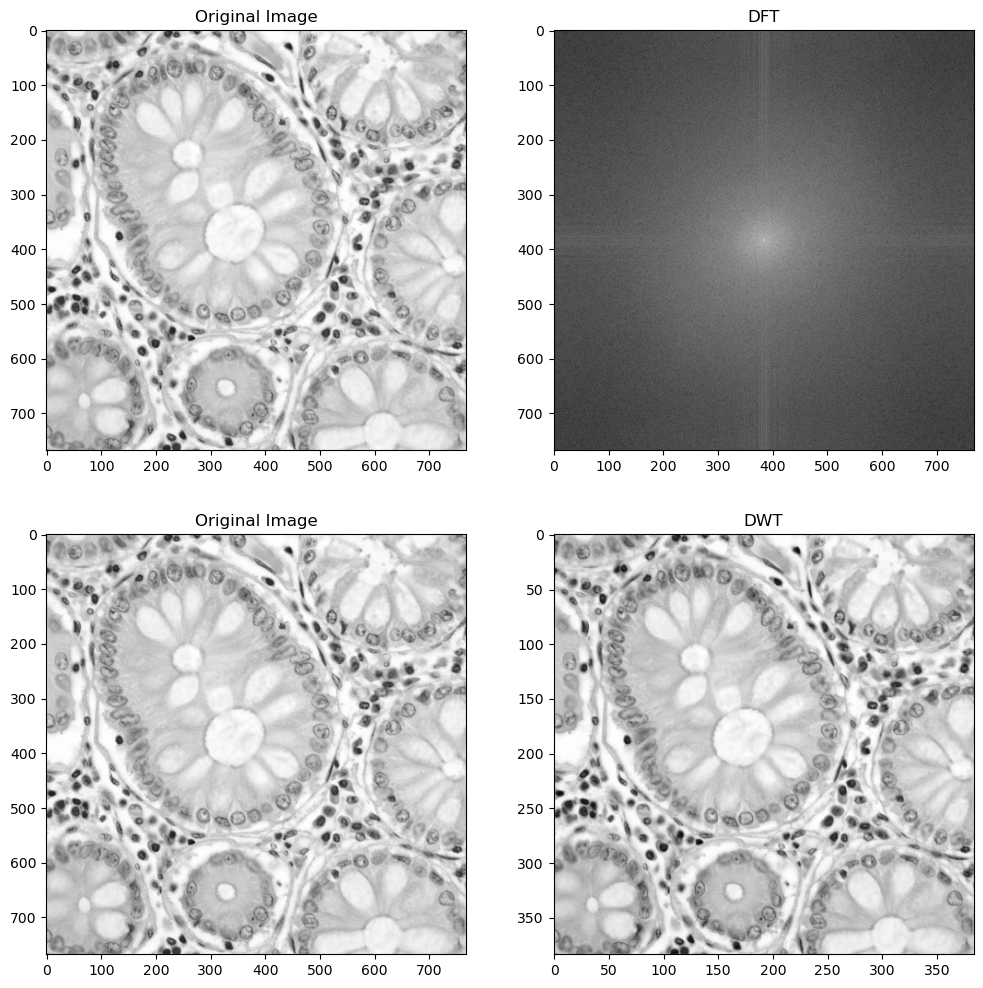

In [18]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
# Load image
img = cv2.imread(r'C:\Users\Asus\Desktop\abc.png',cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(12, 12))
# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Compute the 2D DFT
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Display the processed image
plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT')

# Compute the 2D DWT
coeffs2 = pywt.dwt2(img, 'haar')
cA, (cH, cV, cD) = coeffs2

# Display the processed image
plt.subplot(2, 2, 4)
plt.imshow(cA, cmap='gray')
plt.title('DWT')

# Display the unprocessed image
plt.subplot(2, 2, 3)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.show()
